In [1]:
#!/usr/bin/python
import cv2
import os
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [57]:
IMAGE_FILE = 'image.jpg' # image file
VIDEO_FILE = 'demo.mp4'  # video file
MAX_MATCH_DISTANCE = 25  # match threshold

# Create an ORB object and detect keypoints and descriptors in the template
orb = cv2.ORB_create()
# Create a brute-force matcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [58]:
def load_descriptors(file_name):
    fs = cv2.FileStorage(file_name, cv2.FILE_STORAGE_READ)
    descriptors = fs.getNode("descriptors").mat()
    keypoints = fs.getNode("keypoints").mat()
    fs.release()
    return keypoints, descriptors

In [59]:
def keypoints_from_image_file(image_file):
    img = cv2.imread(image_file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect keypoints and compute descriptors in the frame
    kpts, des = orb.detectAndCompute(gray, None)
    return kpts, des, img

In [60]:
def get_coordinates(matches):
    query, train = [], []
    for match in matches:
        query_idx = match.queryIdx
        train_idx = match.trainIdx
        (x1, y1) = img_keypoints[query_idx].pt
        query.append(np.array((x1, y1)))
        (x2, y2) = ref_keypoints[train_idx]
        train.append(np.array((x2, y2)))
    #Keypoints of the obtained image
    qx = np.array([x for (x, y) in query])
    qy = np.array([y for (x, y) in query])
    #Keypoints of the reference image
    tx = np.array([x for (x, y) in train])
    ty = np.array([y for (x, y) in train])
    return qx, qy, tx, ty

In [61]:
def confidence_x(x, y, n_std=3.0):
    if x.size != y.size: raise ValueError("x and y must be the same size")
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    radius_x = np.sqrt(1 + pearson)
    width = radius_x * 2
    scale_x = np.sqrt(cov[0, 0]) * n_std
    width_x = width * scale_x
    mean_x = np.mean(x)
    return mean_x, width_x

In [62]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    if x.size != y.size: raise ValueError("x and y must be the same size")
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)    
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, facecolor=facecolor, **kwargs)
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    ax.plot(mean_x, mean_y, 'r.')
    transf = transforms.Affine2D().rotate_deg(0).scale(scale_x, scale_y).translate(mean_x, mean_y)
    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)
    transformed_width = ellipse.width * scale_x
    transformed_height = ellipse.height * scale_y

In [63]:
def plot_analysis(x1, y1, x2, y2, h, w):
    #Keypoints of the obtained image##############################
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.plot(x1, y1, '.')
    plt.xlim([0, w])
    plt.ylim([0, h])
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    q_mx, q_widthx = confidence_x(x1, y1)
    line_x1 = [(q_mx-q_widthx/2), (q_mx+q_widthx/2)]
    line_y1 = [h/2, h/2]
    plt.plot(line_x1, line_y1, color = 'b', linestyle = '-')
    confidence_ellipse(x1, y1, ax, edgecolor='red')
    plt.title("Retrived image") 
    #Keypoints of the reference image##############################
    plt.subplot(1, 2, 2) # row 1, col 2 index 2
    plt.plot(x2, y2, '.')
    plt.xlim([0, w])
    plt.ylim([0, h])
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    t_mx, t_widthx = confidence_x(x2, y2)
    line_x2 = [(t_mx-t_widthx/2), (t_mx+t_widthx/2)]
    line_y2 = [h/2, h/2]
    plt.plot(line_x2, line_y2, color = 'b', linestyle = '-')
    confidence_ellipse(x2, y2, ax, edgecolor='red')
    plt.title("Reference image")
    plt.show()    
    print("Axis ratio", q_widthx/t_widthx)
    print("Center deviation", q_mx-t_mx, "\n\n")

Compared with interval 20, Keypoint matches: 3


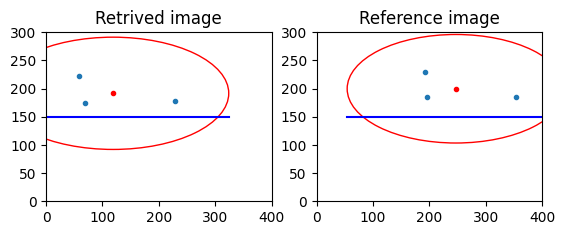

Axis ratio 1.0636465339525278
Center deviation -128.3348388671875 


Compared with interval 22, Keypoint matches: 4


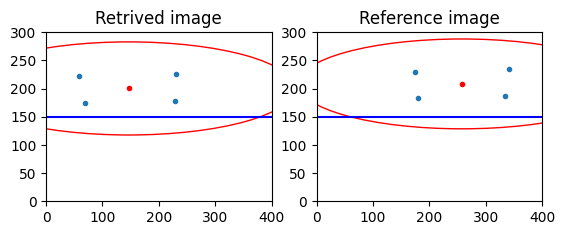

Axis ratio 1.0123421378849022
Center deviation -111.0576057434082 


Compared with interval 23, Keypoint matches: 7


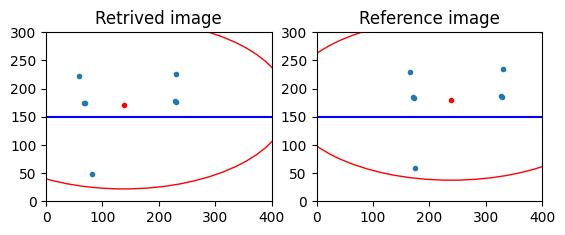

Axis ratio 1.003118991376869
Center deviation -100.51631055559432 


Compared with interval 24, Keypoint matches: 6


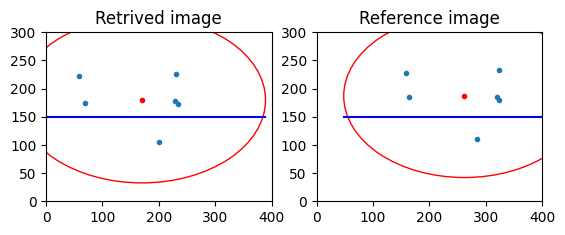

Axis ratio 1.0233925229868046
Center deviation -92.23732248942056 


Compared with interval 25, Keypoint matches: 8


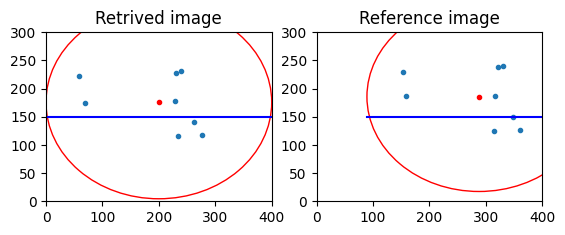

Axis ratio 1.0067058294829778
Center deviation -88.11277198791504 


Compared with interval 26, Keypoint matches: 4


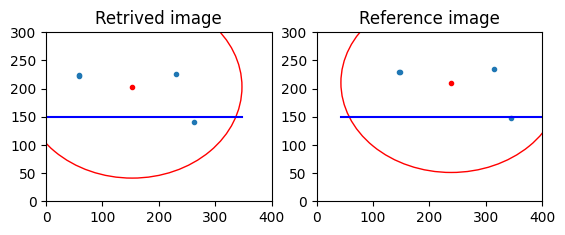

Axis ratio 0.9953313936588277
Center deviation -85.87601089477539 


Compared with interval 27, Keypoint matches: 7


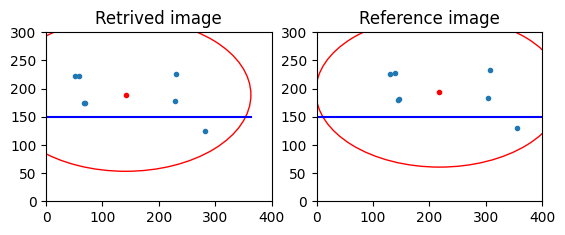

Axis ratio 1.0126986615904383
Center deviation -76.7547084263393 


Compared with interval 28, Keypoint matches: 12


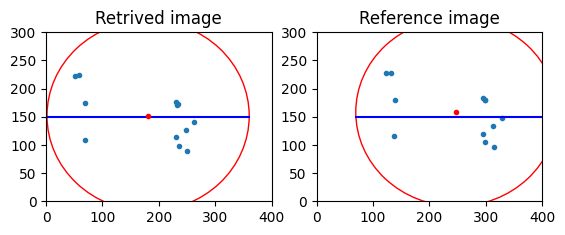

Axis ratio 1.0043784554132895
Center deviation -67.0537281036377 


Compared with interval 29, Keypoint matches: 11


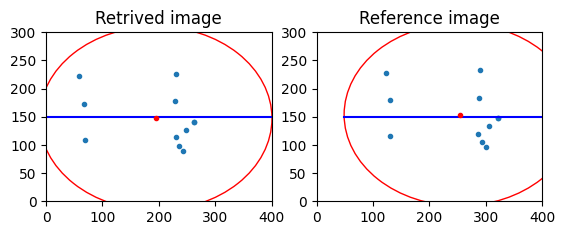

Axis ratio 1.0064284709284257
Center deviation -59.12898462468928 


Compared with interval 30, Keypoint matches: 15


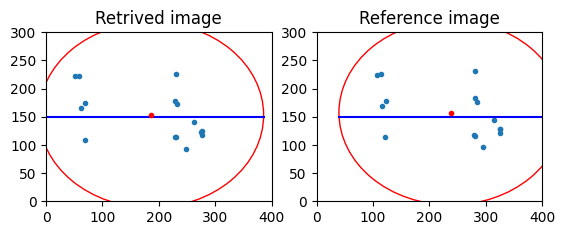

Axis ratio 1.0031437930903413
Center deviation -51.612779490153 


Compared with interval 31, Keypoint matches: 18


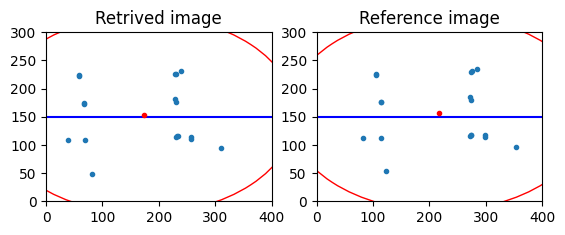

Axis ratio 1.0028606268842646
Center deviation -43.597030427720824 


Compared with interval 32, Keypoint matches: 17


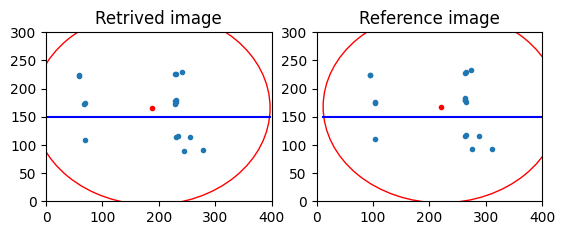

Axis ratio 1.002246687532263
Center deviation -33.982170553768384 


Compared with interval 33, Keypoint matches: 28


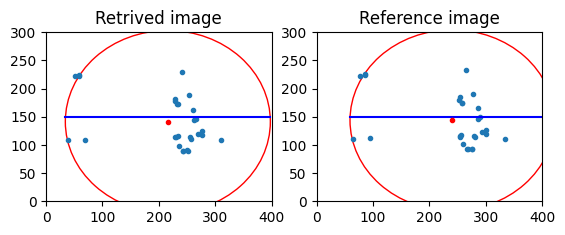

Axis ratio 1.0030858974568777
Center deviation -24.513139316013877 


Compared with interval 34, Keypoint matches: 28


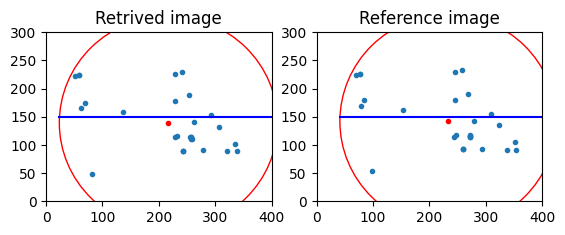

Axis ratio 1.0088597528784227
Center deviation -16.06712790897913 


Compared with interval 35, Keypoint matches: 25


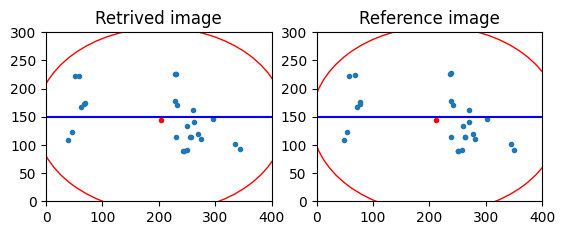

Axis ratio 1.0040627885285212
Center deviation -7.997901611328132 


Compared with interval 36, Keypoint matches: 29


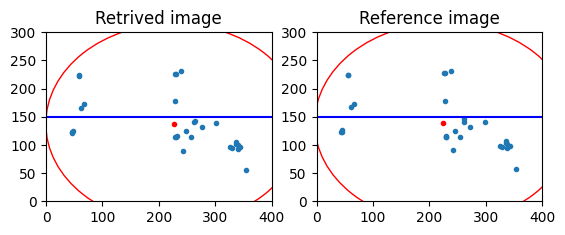

Axis ratio 0.99544874725273
Center deviation 1.9196095959893569 


Compared with interval 37, Keypoint matches: 31


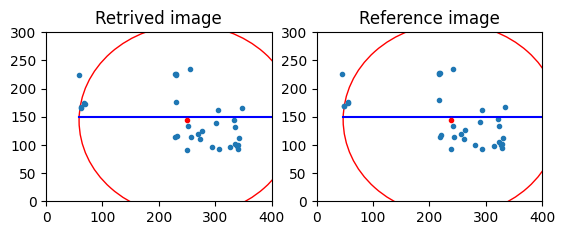

Axis ratio 1.0034153910988248
Center deviation 12.11802045760615 


Compared with interval 38, Keypoint matches: 30


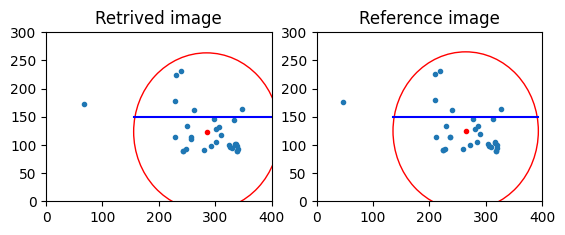

Axis ratio 1.0029798102574963
Center deviation 20.249701690673817 


Compared with interval 39, Keypoint matches: 27


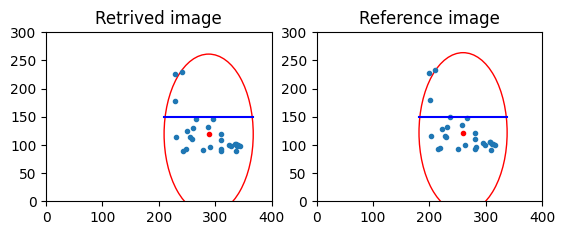

Axis ratio 1.0115043813168967
Center deviation 28.642042937102133 


Compared with interval 40, Keypoint matches: 22


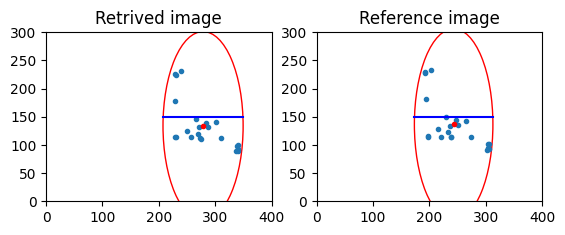

Axis ratio 1.020455184404178
Center deviation 35.420355363325655 


Compared with interval 41, Keypoint matches: 13


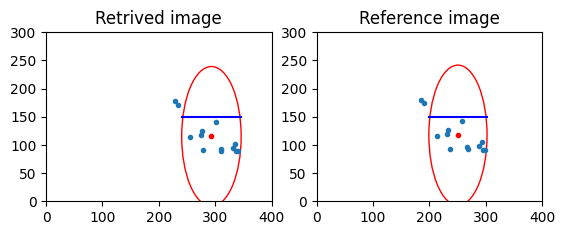

Axis ratio 1.0218775921614636
Center deviation 42.61243614783655 


Compared with interval 42, Keypoint matches: 10


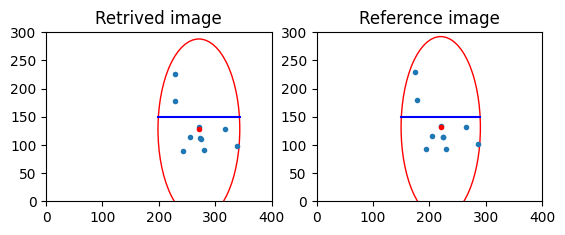

Axis ratio 1.0315953494465713
Center deviation 50.902435302734375 


Compared with interval 43, Keypoint matches: 9


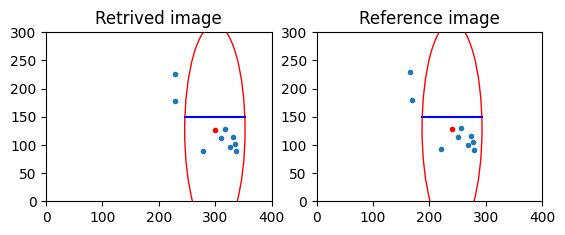

Axis ratio 1.0072831333701115
Center deviation 59.20939297146265 


Compared with interval 44, Keypoint matches: 11


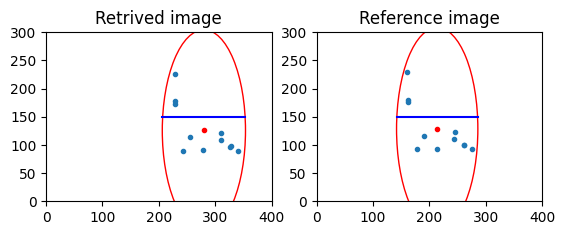

Axis ratio 1.0234001827961645
Center deviation 66.06259432705966 


Compared with interval 45, Keypoint matches: 7


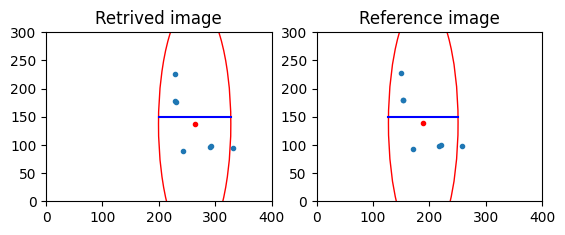

Axis ratio 1.0388088171533743
Center deviation 74.44023786272322 


Compared with interval 46, Keypoint matches: 4


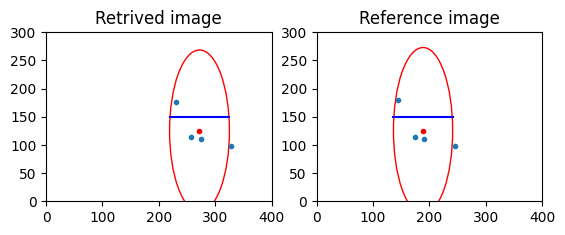

Axis ratio 1.0109409620933427
Center deviation 83.36654281616211 


Compared with interval 47, Keypoint matches: 5


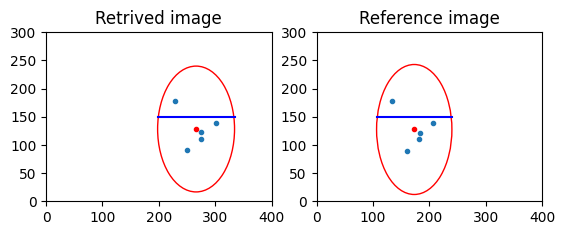

Axis ratio 1.0212381334190195
Center deviation 92.94511108398436 


Compared with interval 49, Keypoint matches: 3


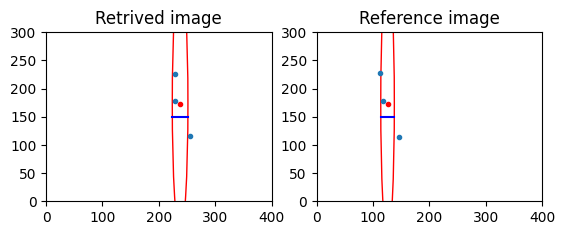

Axis ratio 1.152655899666635
Center deviation 111.96534220377603 


Compared with interval 50, Keypoint matches: 3


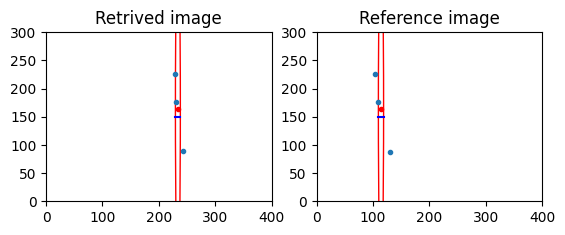

Axis ratio 0.9464925185006104
Center deviation 119.65867360432942 




In [66]:
if __name__ == '__main__':
    # Load the ORB feature detector and descriptor from the image
    img_keypoints, img_descriptors, img = keypoints_from_image_file(IMAGE_FILE)
    # Determine the height and width of the image
    h, w, c = img.shape
    for i in range(len([entry for entry in os.listdir("demo_kpt_des")])):
        # load the  for i in range(descriptor for the interval
        ref_keypoints, ref_descriptors = load_descriptors("demo_kpt_des/demo_kpt_des" + str(i+1) + ".yml")
        # match the descriptors with the image
        matches = bf.match(img_descriptors, ref_descriptors)
        matches = [m for m in matches if m.distance < MAX_MATCH_DISTANCE]
        if len(matches) < 3: continue
        qx, qy, tx, ty = get_coordinates(matches)
        print("Compared with interval " + str(i+1) + ", Keypoint matches: " + str(len(matches)))
        plot_analysis(qx, qy, tx, ty, h, w)